In [10]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
pole_length = 0.3 #[m]
angle=0
time_interval = 0.2 #[sec]
g=9.8 #[m/s^2]
ball_mass = 0.02 #[kg]
ball_radius = 0.025 #[m]
friction_coefficient = 0.2
v0 = 0
w0 = 0
x0 = 0 #[m]
I_ball  = (2/3)*ball_mass*(ball_radius**2)

In [13]:
imgarr = []
for i in range(-10,11):
    degree=i
    print("current degree:",degree)
    angle=math.pi*(degree/180)
    angular_acceleration = (3/2)*(g/ball_radius)*friction_coefficient*math.cos(angle)
    a=(ball_radius*friction_coefficient*ball_mass*g*math.cos(angle))/((2/3)*ball_mass*ball_radius*ball_radius)
    #after [time_interval]
    if(angle>=0):
      angle_sign = 1
    else:
      angle_sign = -1
    current_w = w0 + angle_sign*angular_acceleration*time_interval 
    current_theta = w0*time_interval + (1/2)*angle_sign*angular_acceleration*(time_interval**2)
    current_x = x0 + ball_radius*current_theta

    w0 = current_w
    #print("after",time_interval,"[sec], at angle=",angle*180/math.pi,"[deg], the ball moved to ",current_x)

    normalize_x = 300-current_x*300/1.5
    print("current_x",current_x)
    print("normalize_x",normalize_x)
    height,width=240,640
    length = 610
    image = np.ones((height, width)) * 255
    #draw line
    
    x1, y1 = int(width/2), int(height/2)
    x2 = x1+int(length/2*math.cos(angle))
    y2 = y1+int(length/2*math.sin(angle))
    x1,y1 = (x1-int(length/2*math.cos(angle))),(y1-int(length/2*math.sin(angle)))
    line_thickness = 2
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)

    M = (y2-y1)/(x2-x1)
    y_center_of_circle = M*normalize_x + y1 -M*x1

    #draw circle
    radius = 10
    center_coordinates = (int(normalize_x),int(y_center_of_circle+radius))
    color = (0, 255, 0)
    thickness = 2
    image = cv2.circle(image, center_coordinates, radius, color, thickness)
    print(image.shape)
    #imgarr = np.append(imgarr,image)
    imgarr.append(image.astype(np.uint8))
#fig = plt.figure()
#plt1 = fig.add_subplot(1,1,1)
#plt.imshow(image,cmap='Greys_r',origin='lower')

current degree: -10
current_x -0.057906695877117845
normalize_x 311.5813391754236
(240, 640)
current degree: -9
current_x -0.1738894661812298
normalize_x 334.777893236246
(240, 640)
current degree: -8
current_x -0.2901933030502282
normalize_x 358.03866061004567
(240, 640)
current degree: -7
current_x -0.4067827792087423
normalize_x 381.35655584174845
(240, 640)
current degree: -6
current_x -0.5236223803729064
normalize_x 404.7244760745813
(240, 640)
current degree: -5
current_x -0.6406765160683556
normalize_x 428.13530321367114
(240, 640)
current degree: -4
current_x -0.7579095304714281
normalize_x 451.5819060942856
(240, 640)
current degree: -3
current_x -0.8752857132702747
normalize_x 475.0571426540549
(240, 640)
current degree: -2
current_x -0.9927693105425665
normalize_x 498.5538621085133
(240, 640)
current degree: -1
current_x -1.1103245356464853
normalize_x 522.064907129297
(240, 640)
current degree: 0
current_x -1.1103155801216809
normalize_x 522.0631160243362
(240, 640)
current

<ipython-input-34-34d7260474c6>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


AttributeError: module 'matplotlib.pyplot' has no attribute 'to_html5_video'

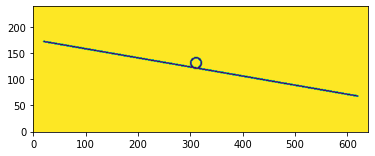

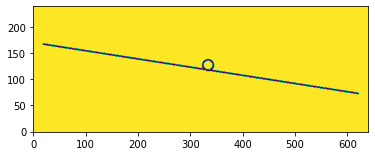

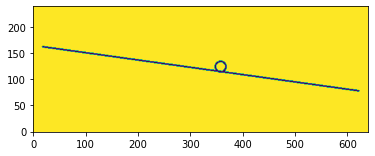

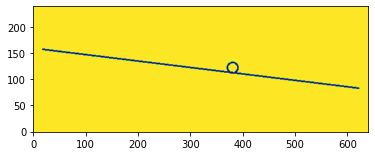

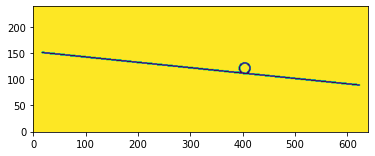

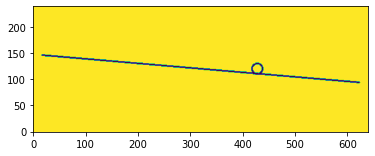

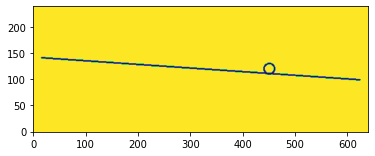

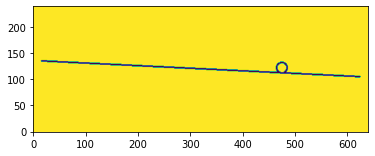

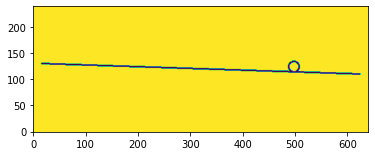

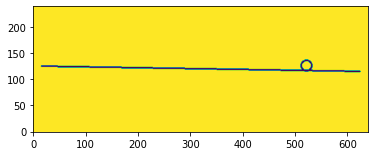

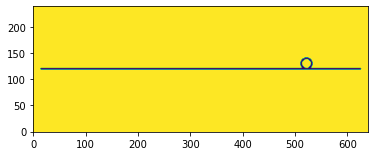

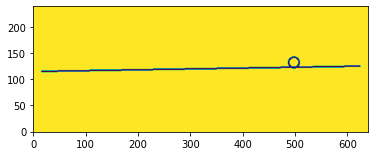

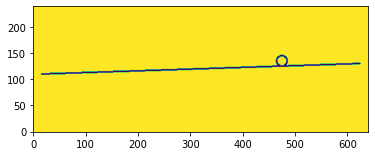

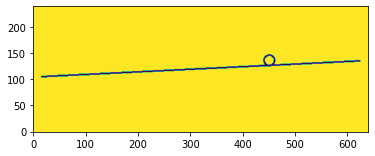

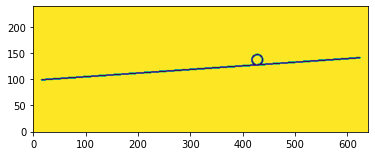

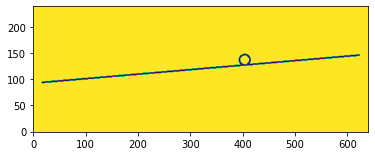

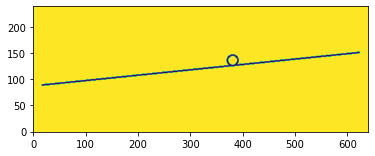

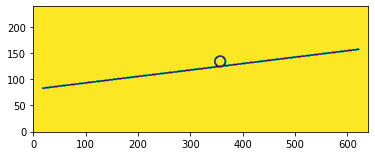

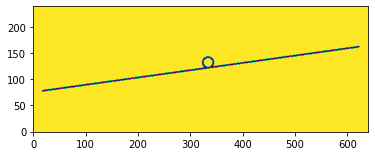

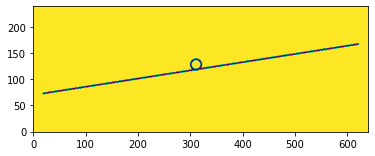

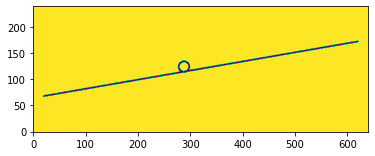

In [34]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
#need to stack nparrays

for i in range(0,21):
   plt.figure()
   plt.imshow(imgarr[i],origin='lower')
#   plt.show()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],interval=50)
HTML(plt.to_html5_video())
#imgarr[0].shape
#Image.fromarray(np.uint8(imgarr[15])).convert('RGB')
#for i in imgarr:
#   Image.fromarray(np.uint8(i)).convert('RGB')

In [40]:
import imageio; 
from IPython.display import Video; 
edges = np.random.randn(100, 80, 80)
edges[0].shape
#edges.shape
#imageio.mimwrite('test2.mp4', edges, fps=30); 
#Video('test2.mp4', width=480, height=360)

(80, 80)